# Sound features exploration

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import IPython
import math

### Display one audio sample

In [2]:
IPython.display.Audio("section_00_source_train_normal_0001_m-n_X.wav") 

In [3]:
soundb1, sr = librosa.load("section_00_source_train_normal_0001_m-n_X.wav") 

## Basic information regarding audio files

In [5]:
soundb1.shape

(220500,)

In [6]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [7]:
# total number of samples in audio file
tot_samples = len(soundb1)
tot_samples

220500

In [8]:
# duration of soundb1 audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 10.0 seconds


## Visualising audio signal in the time domain

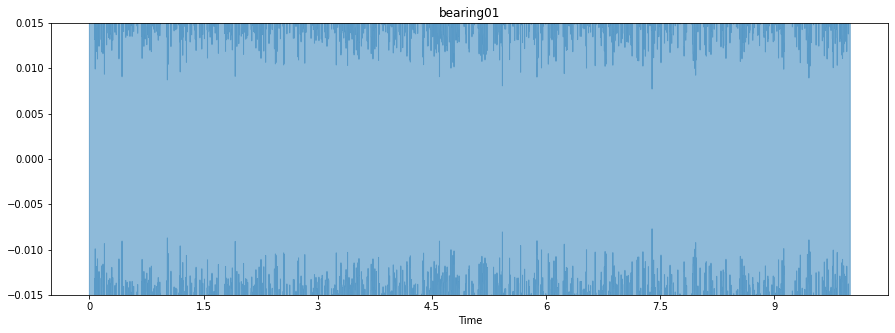

In [10]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(soundb1, alpha=0.5)
plt.ylim((-0.015, 0.015))
plt.title("bearing01")
## remplacer le titre par celui voulu
plt.show()

## Calculating amplitude envelope

In [12]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [13]:
def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)    

def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [14]:
# number of frames in amplitude envelope
ae_soundb1 = amplitude_envelope(soundb1, FRAME_SIZE, HOP_LENGTH)
len(ae_soundb1)

431

## Visualising amplitude envelope

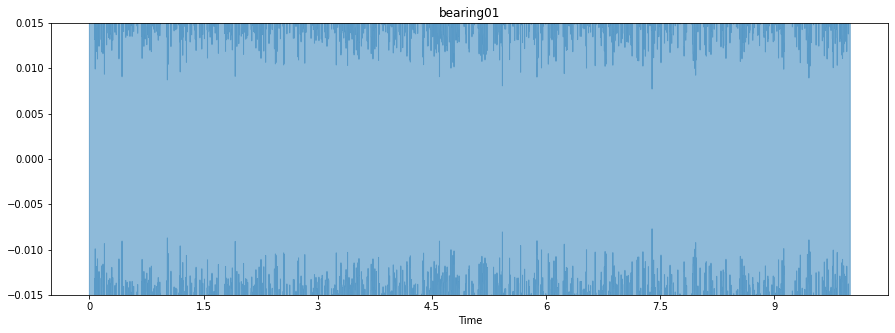

In [16]:
frames = range(len(ae_soundb1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(soundb1, alpha=0.5)
plt.plot(t, ae_soundb1, color="r")
plt.ylim((-0.015, 0.015))
plt.title("bearing01")

plt.show()

## Root-mean-squared energy 

In [18]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [19]:
rms_soundb1 = librosa.feature.rms(soundb1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

C:\Users\sylv_\AppData\Local\Temp\ipykernel_4680\3879344910.py:1: FutureWarning: Pass y=[-0.0119566   0.00030768  0.01475665 ... -0.02276557 -0.01731646
 -0.01223639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_soundb1 = librosa.feature.rms(soundb1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


### Visualise RMSE + waveform

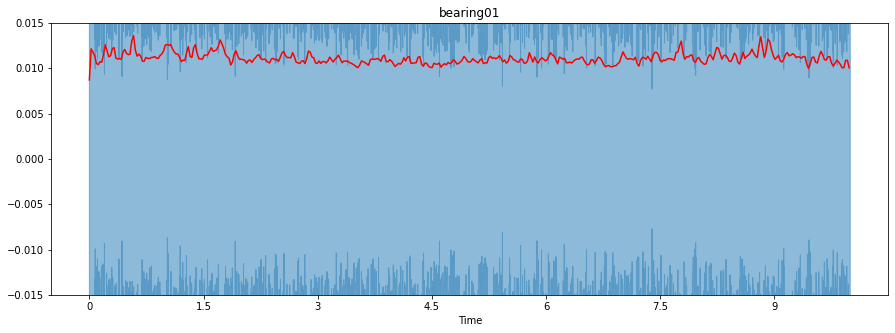

In [21]:
frames = range(len(rms_soundb1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(soundb1, alpha=0.5)
plt.plot(t, rms_soundb1, color="r")
plt.ylim((-0.015, 0.015))
plt.title("bearing01")

plt.show()

### RMSE from scratch

In [23]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)    

In [24]:
rms_soundb11 = rmse(soundb1, FRAME_SIZE, HOP_LENGTH)

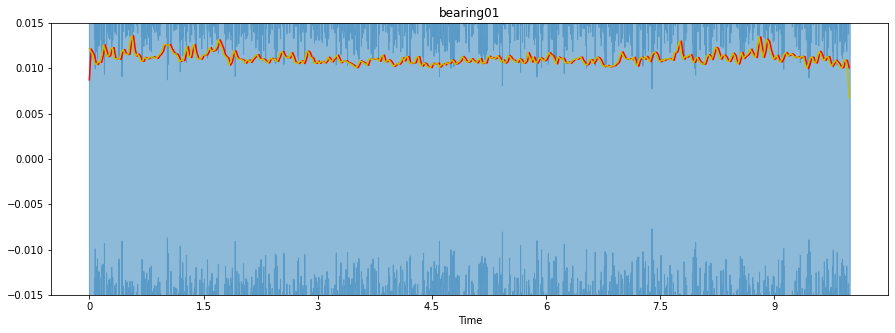

In [25]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(soundb1, alpha=0.5)
plt.plot(t, rms_soundb1, color="r")
plt.plot(t, rms_soundb11, color="y")
plt.ylim((-0.015, 0.015))
plt.title("bearing01")

plt.show()

## Zero-crossing rate 

In [27]:
zcr_soundb1 = librosa.feature.zero_crossing_rate(soundb1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

zcr_soundb1.size

431

### Visualise zero-crossing 

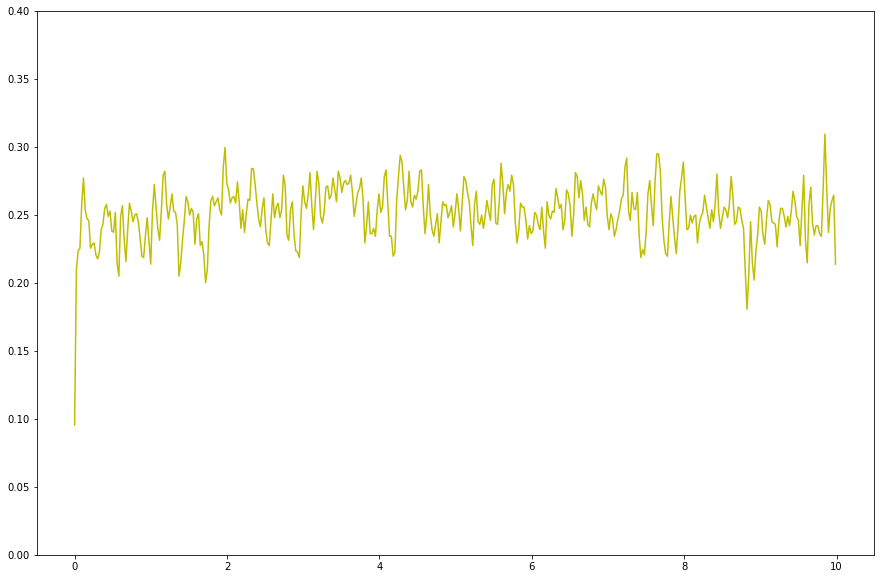

In [29]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_soundb1, color="y")
plt.ylim(0, 0.4)
plt.show()

## Magnitude-frequence spectrum

In [31]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)

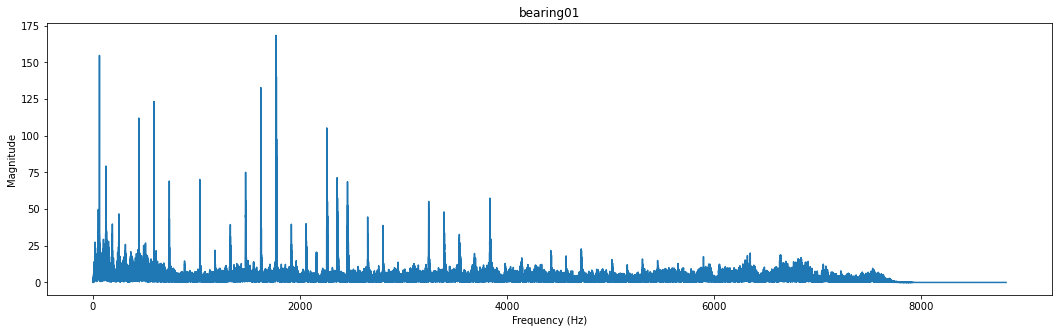

In [32]:
plot_magnitude_spectrum(soundb1, sr, "bearing01", 0.4)

## Extracting Short-Time Fourier Transform

In [34]:
FRAME_SIZE = 2048
HOP_SIZE = 512

S_soundb1 = librosa.stft(soundb1, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

S_soundb1.shape

(1025, 431)

In [35]:
type(S_soundb1[0][0])

numpy.complex64

### Calculating the spectrogram

In [37]:
Y_soundb1 = np.abs(S_soundb1) ** 2

Y_soundb1.shape

(1025, 431)

In [38]:
type(Y_soundb1[0][0])

numpy.float32

### Visualizing the spectrogram

In [40]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

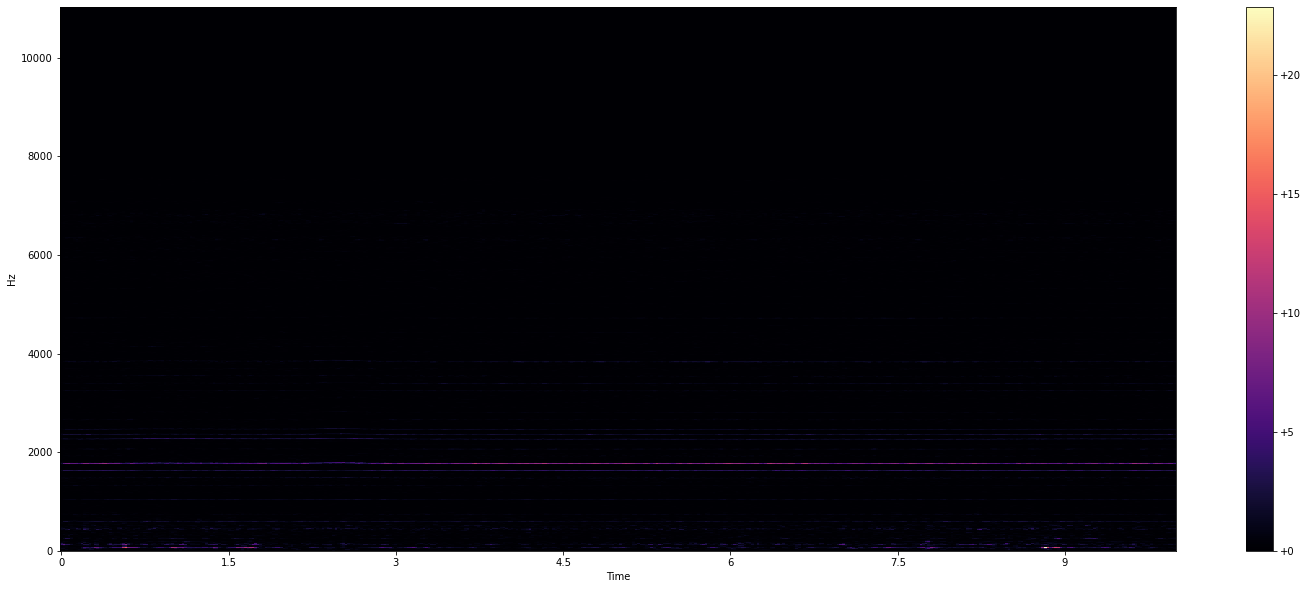

In [41]:
plot_spectrogram(Y_soundb1, sr, HOP_SIZE)

### Log-Amplitude Spectrogram

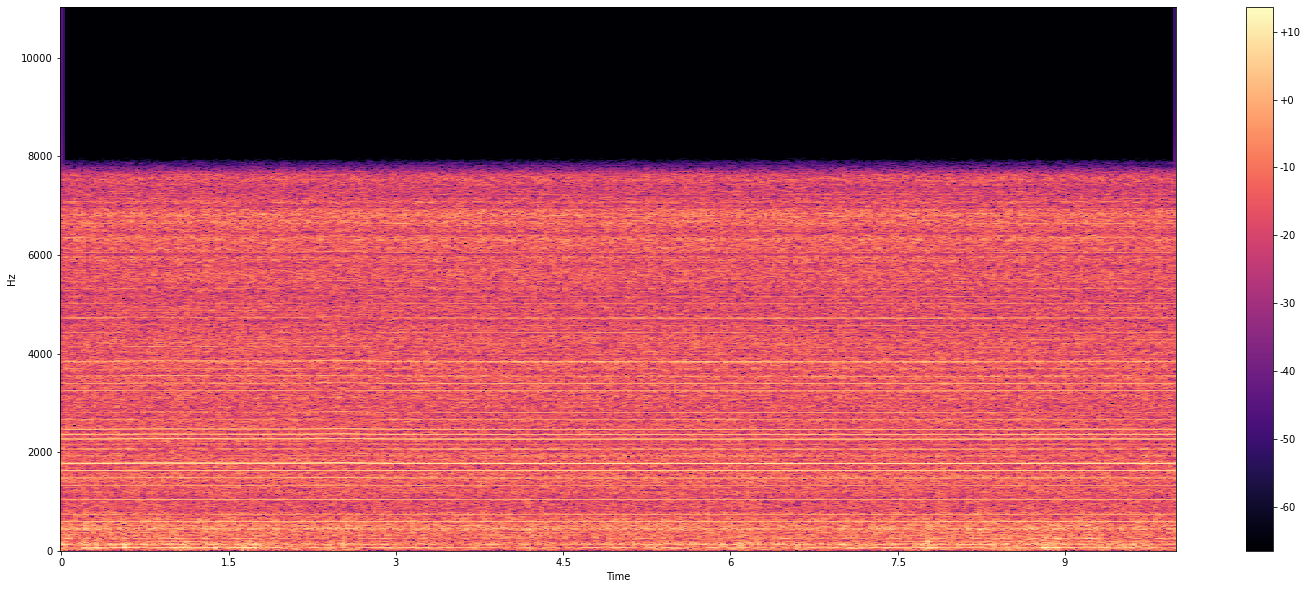

In [43]:
Y_log_soundb1 = librosa.power_to_db(Y_soundb1)
plot_spectrogram(Y_log_soundb1, sr, HOP_SIZE)

### Log-Frequency Spectrogram

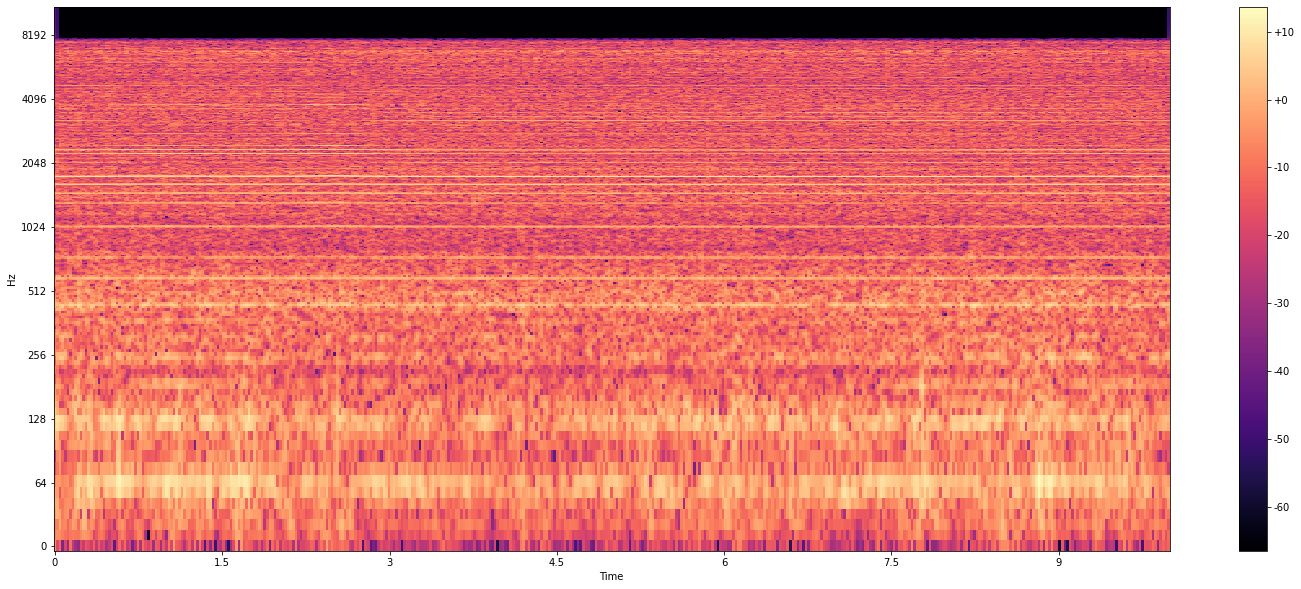

In [45]:
plot_spectrogram(Y_log_soundb1, sr, HOP_SIZE, y_axis="log")

## Mel filter banks

In [47]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [48]:
filter_banks.shape

(10, 1025)

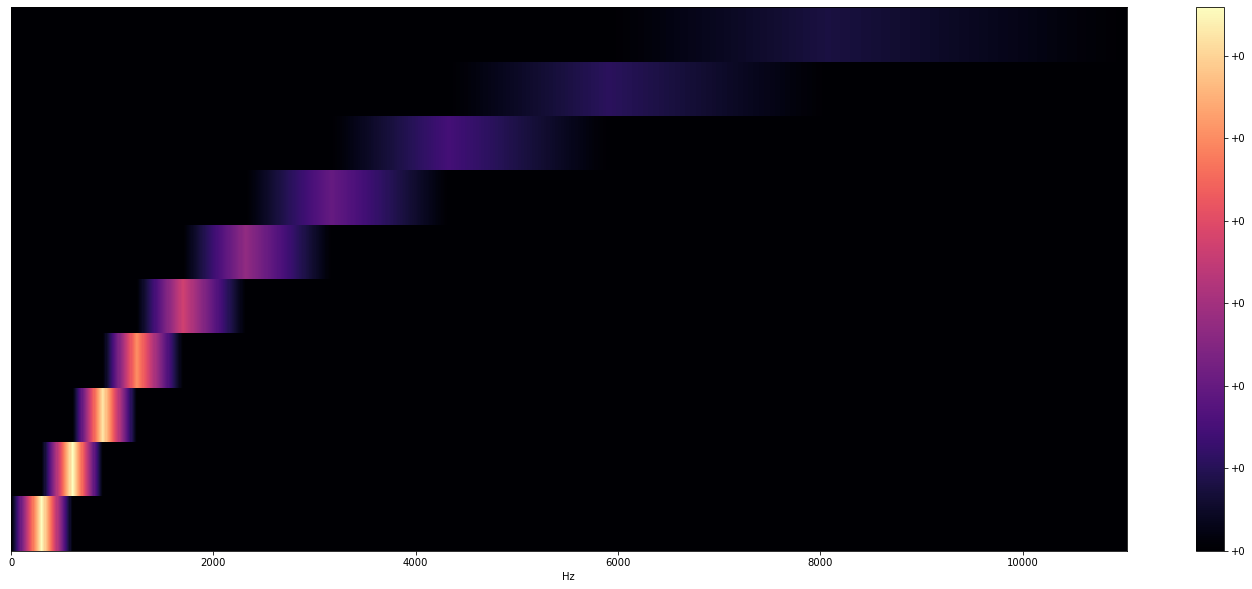

In [49]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

## Extracting Mel Spectrogram

In [51]:
mel_spectrogram = librosa.feature.melspectrogram(soundb1, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

mel_spectrogram.shape

C:\Users\sylv_\AppData\Local\Temp\ipykernel_4680\1990366709.py:1: FutureWarning: Pass y=[-0.0119566   0.00030768  0.01475665 ... -0.02276557 -0.01731646
 -0.01223639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(soundb1, sr=sr, n_fft=2048, hop_length=512, n_mels=10)


(10, 431)

In [52]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

log_mel_spectrogram.shape

(10, 431)

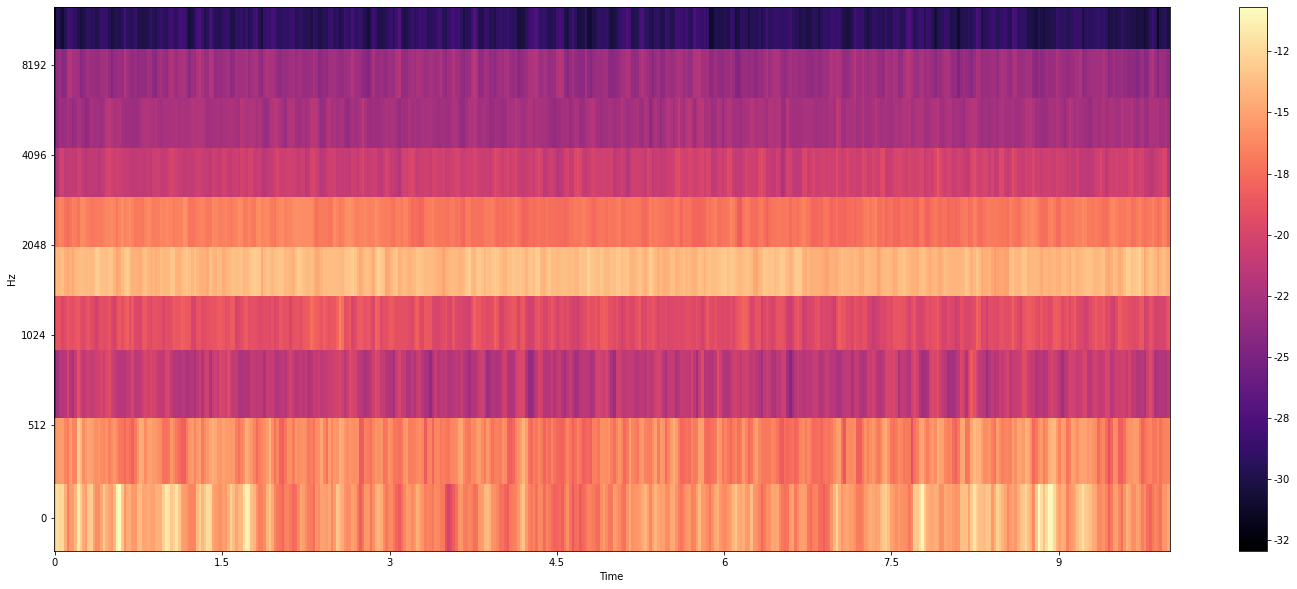

In [53]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Extracting MFCCs

In [55]:
mfccs = librosa.feature.mfcc(y=soundb1, n_mfcc=13, sr=sr)

mfccs.shape

(13, 431)

### Visualising MFCCs

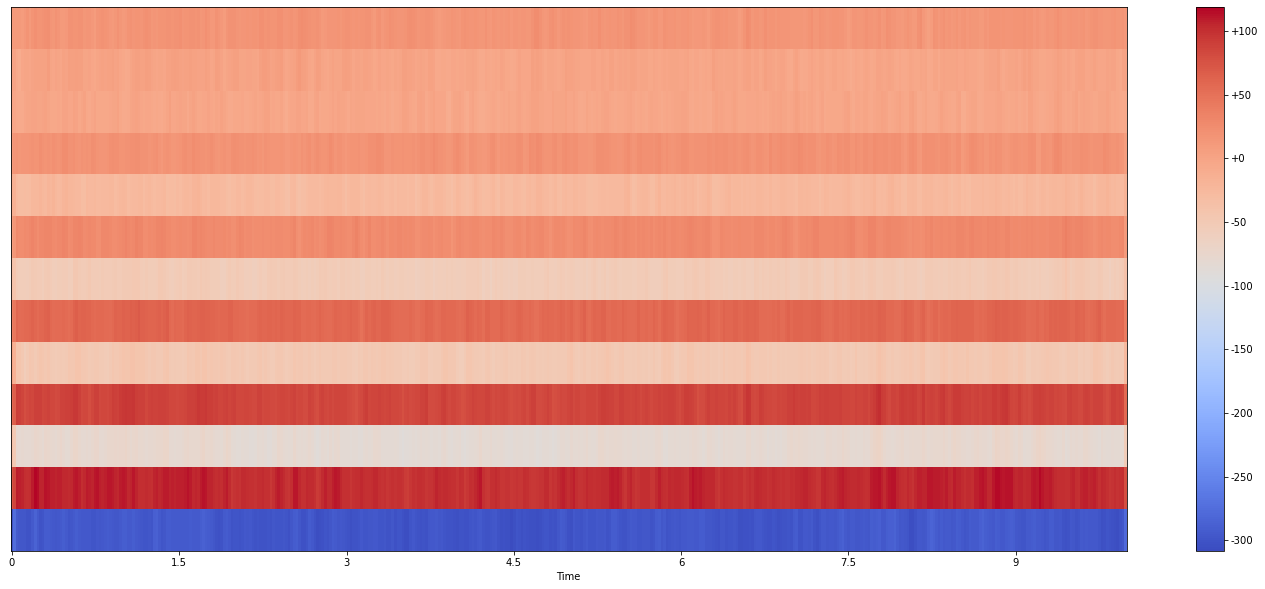

In [57]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## first / second MFCCs derivatives

In [59]:
delta_mfccs = librosa.feature.delta(mfccs)

delta2_mfccs = librosa.feature.delta(mfccs, order=2)

delta_mfccs.shape

(13, 431)

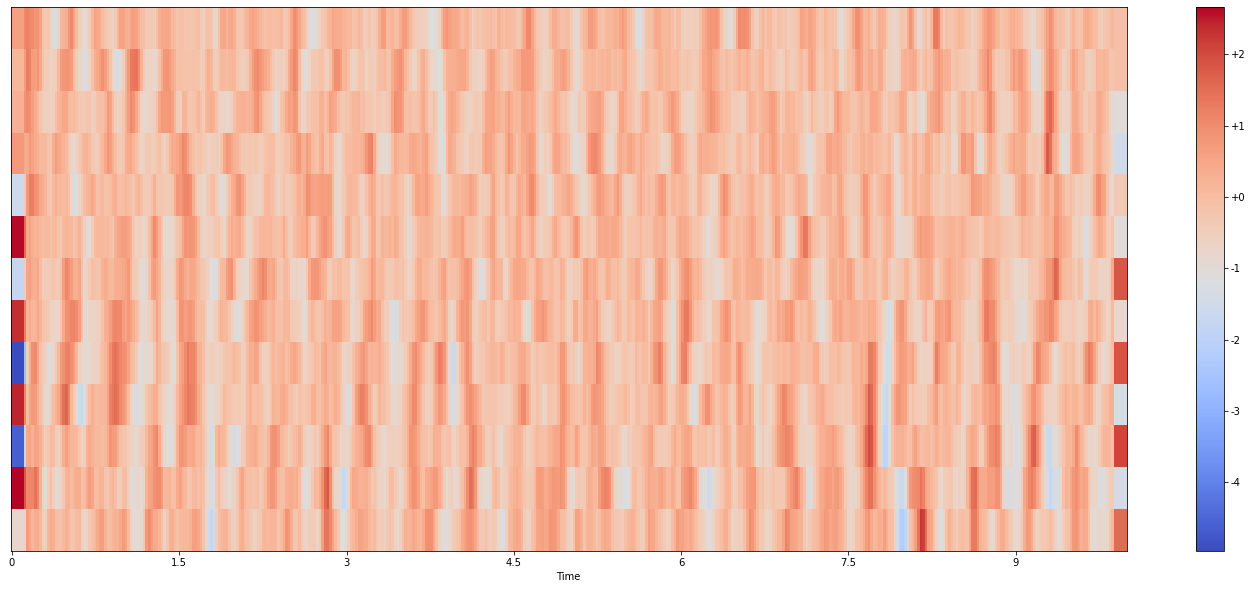

In [60]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

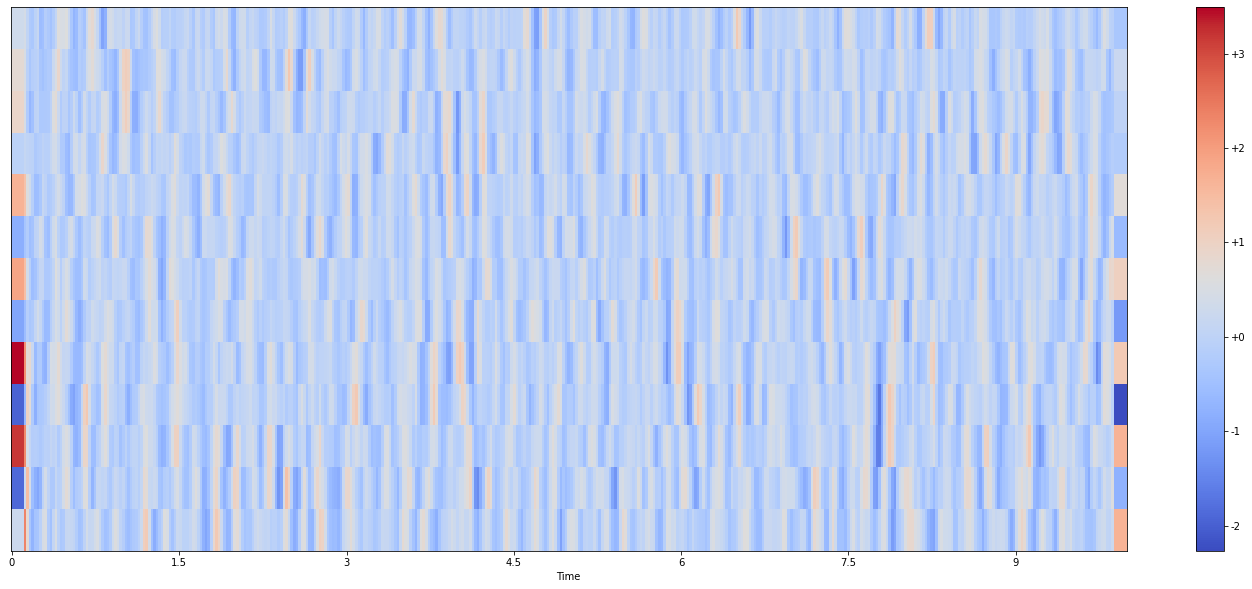

In [61]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [62]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [63]:
mfccs_features.shape

(39, 431)

## Calculate Band Energy Ratio

In [65]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [66]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1000)
split_frequency_bin

181

In [67]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [68]:
ber_soundb1 = band_energy_ratio(S_soundb1, 2000, sr)

In [69]:
len(ber_soundb1)

431

### Visualise Band Energy Ratio

In [71]:
frames = range(len(ber_soundb1))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

## Spectral centroid with Librosa

In [74]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [75]:
sc_soundb1 = librosa.feature.spectral_centroid(y=soundb1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

sc_soundb1.shape

(431,)

### Visualising spectral centroid

In [77]:
frames = range(len(sc_soundb1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

len(t)

431

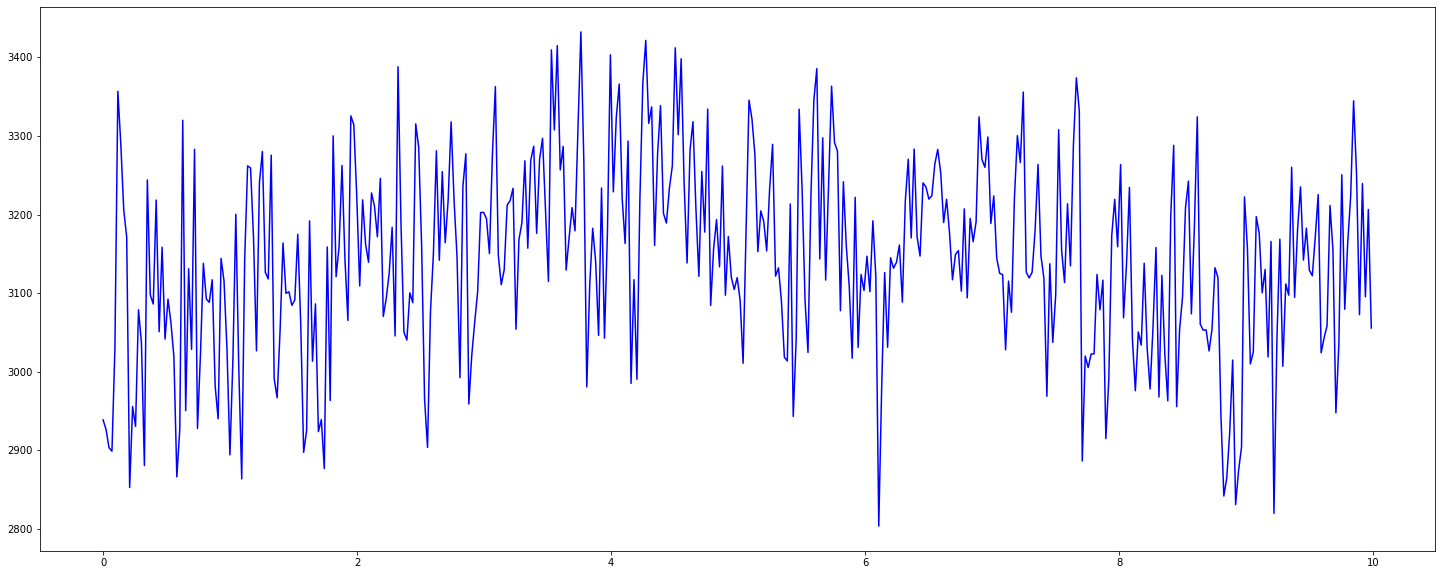

In [78]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_soundb1, color='b')
plt.show()

## Spectral bandwidth 

In [80]:
ban_soundb1 = librosa.feature.spectral_bandwidth(y=soundb1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

ban_soundb1.shape

(431,)

### Visualising spectral bandwidth

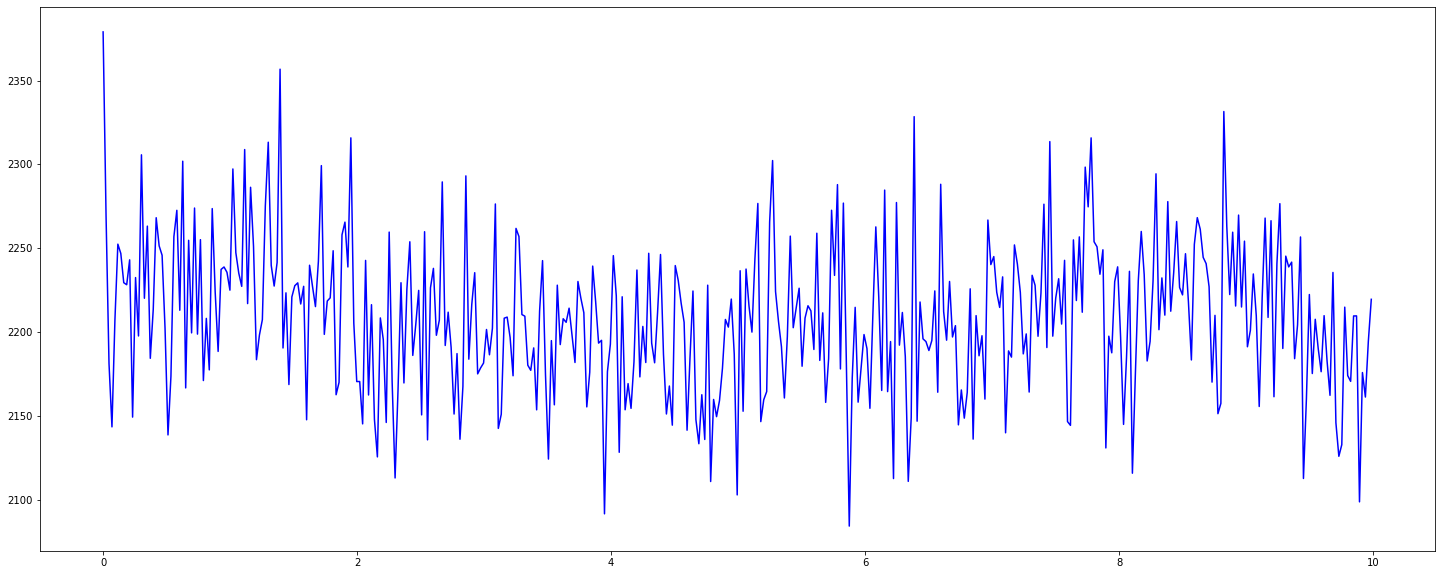

In [81]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_soundb1, color='b')
plt.show()

In [ ]:
import pywt
import scipy.io.wavfile

wavefile = 'path to the wavefile'
sampling_frequency, signal = scipy.io.wavfile.read(wavefile)
scales = (1, len(signal))
coefficient, frequency = pywt.cwt(signal, scales, 'mrlt')